# Open spectrum from root-files
Author:

J. Angevaare // <j.angevaare@nikhef.nl> // 2020-05-25

Until now we have only been dealing with small files that make it easy to see what is going on. Perhaps we want at some point to get more data from the stoomboot computing cluster or the appended root-file as in this folder. This notebook will show how to and we make an exemplary coincidence plot for Ti-44 using much more data than in the previous tutorials.

Below we:
 - open a root file using uproot
 - show a calibrated spectrum
 - show a Ti-44 coincidence plot

## Open the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numba
import uproot3
import tqdm
import os

C:\Users\joran\Anaconda3\lib\site-packages\uproot3-3.14.2-py3.7.egg\uproot3\__init__.py:138: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  FutureWarning
C:\Users\joran\Anaconda3\lib\site-packages\awkward0\__init__.py:23: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  FutureWarning


In [ ]:
try:
    import RP2021
except ModuleNotFoundError:
    # This module is not installed correctly, let's hack it in
    import sys
    import os
    path = os.path.join(os.path.abspath('.'), '..')
    sys.path.append(path) 
    import RP2021

In [2]:
# Let's look at the first root file in the list above
path = '../data/mx_n_20200104_1055_000055.root'

In [3]:
file = uproot3.open(path)

In [4]:
tree = file['T;2']

In [5]:
data = tree.pandas.df()

In [6]:
# Let's have a look at how the data looks like
data[['channel', 'integral', 'height', 'time', 'istestpulse', 'error', 'baseline', 'rms', 'ratio', 'humid', 'sec']]

,channel,integral,height,time,istestpulse,error,baseline,rms,ratio,humid,sec
entry,,,,,,,,,,,
0,5,1258.489746,0.756836,3.787286e+09,0,0,660.000000,8.000000,0.872195,-9.16,12510.0
1,6,1299.349243,1.729395,3.787286e+09,0,1,776.799988,2.993326,0.863694,-9.16,12510.0
2,2,1663.329346,0.942187,3.787286e+09,0,0,721.599976,8.236505,0.880226,-9.16,12510.0
3,3,543.199829,0.382129,3.787286e+09,0,0,661.599976,7.838367,0.861325,-9.16,12510.0
4,4,1328.034302,0.510059,3.787286e+09,0,0,769.599976,1.959592,0.899736,-9.16,12510.0
5,2,501.850494,0.309082,3.787286e+09,0,0,724.000000,5.059644,0.911603,-9.16,12510.0
6,3,534.243225,0.422461,3.787286e+09,0,0,667.200012,6.881860,0.860055,-9.16,12510.0
7,6,250.130219,0.357422,3.787286e+09,0,0,780.000000,2.529822,0.900676,-9.16,12510.0
8,7,691.615723,0.924609,3.787286e+09,0,0,729.599976,4.079216,0.881640,-9.16,12510.0


## plot a spectrum of a source, we are starting with Co60!

In [7]:
mask =  (
    (data['channel'] == 4 ) | (data['channel'] == 5 ) 
    & (data['istestpulse'] == 0) 
    & (data['error'] == 0) 
)
co60 = data[mask]

In [8]:
co60

,channel,integral,height,time,istestpulse,error,baseline,rms,ratio,temp,...,humid,sec,hv0,hv1,hv2,hv3,hv4,hv5,hv6,hv7
entry,,,,,,,,,,,,,,,,,,,,,
0,5,1258.489746,0.756836,3.787286e+09,0,0,660.000000,8.000000,0.872195,29.4,...,-9.16,12510.0,619.099976,709.400024,679.400024,699.400024,989.299988,669.000000,659.0,729.099976
4,4,1328.034302,0.510059,3.787286e+09,0,0,769.599976,1.959592,0.899736,29.4,...,-9.16,12510.0,619.099976,709.400024,679.400024,699.400024,989.299988,669.000000,659.0,729.099976
9,4,1211.037231,0.442285,3.787286e+09,0,0,768.799988,5.306600,0.901098,29.4,...,-9.16,12510.0,619.099976,709.400024,679.400024,699.400024,989.299988,669.000000,659.0,729.099976
15,4,893.122253,0.337598,3.787286e+09,0,0,766.400024,5.425864,0.908753,29.4,...,-9.16,12510.0,619.099976,709.400024,679.400024,699.400024,989.299988,669.000000,659.0,729.099976
16,5,241.214294,0.177051,3.787286e+09,0,0,665.599976,3.200000,0.936039,29.4,...,-9.16,12510.0,619.099976,709.400024,679.400024,699.400024,989.299988,669.000000,659.0,729.099976
26,5,1584.986572,0.971484,3.787286e+09,0,0,665.599976,5.425864,0.887517,29.4,...,-9.16,12510.0,619.099976,709.400024,679.400024,699.400024,989.299988,669.000000,659.0,729.099976
27,5,386.018799,0.233008,3.787286e+09,0,0,667.200012,2.993326,0.908380,29.4,...,-9.16,12510.0,619.099976,709.400024,679.400024,699.400024,989.299988,669.000000,659.0,729.099976
28,4,1616.608765,0.612500,3.787286e+09,0,0,766.400024,4.079216,0.883513,29.4,...,-9.16,12510.0,619.099976,709.400024,679.400024,699.400024,989.299988,669.000000,659.0,729.099976
36,4,423.311646,0.160254,3.787286e+09,0,0,767.200012,4.664762,0.938011,29.4,...,-9.16,12510.0,619.099976,709.400024,679.400024,699.400024,989.299988,669.000000,659.0,729.099976


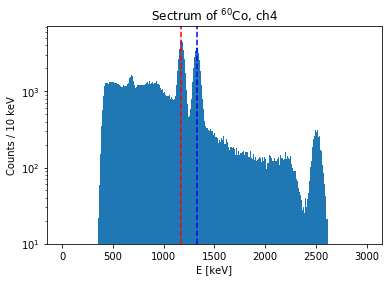

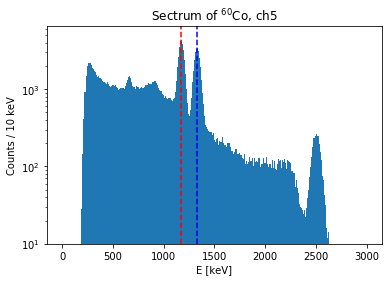

In [9]:
for ch in np.unique(co60['channel']):
    plt.title('Sectrum of ${}^{60}$Co'f', ch{ch}')
    selection = (co60['channel']==ch)
    plt.hist(co60[selection]['integral'].values, bins = 300, range=[0,3000])
    plt.yscale('log')
    plt.ylim(10,plt.ylim()[-1])
    plt.axvline(1173.2, c = 'r', linestyle = '--')
    plt.axvline(1332.5, c = 'b', linestyle = '--')
    plt.xlabel('E [keV]')
    plt.ylabel('Counts / 10 keV')
    plt.show()

## Save small selection
For further use cases we want to save a copy where we have somewhat less data such that we can use this to do small tests with.

This is actually where the CSV file that was used in the previous tutorials was created. You can see that we have capped the max number of events in this file to 100000.

In [10]:
co60[['channel', 'integral','time']][:100000].to_csv('../data/Co60_sample.csv',index=False)

# Ti44

Below, we'll do the same thing as we have done earlier for Co60 in the 3rd session. Now we'll do the same for Ti44 but with much higher statistics!

Can you again explain all of the spectrum we will see below? Good luck!

In [12]:
# Let's cut out some data where we are not interested in anyway
mask =  ((data['istestpulse'] == 0)  & (data['error'] == 0) )
data = data[mask]

In [13]:
print(f'Pay attention, we are going to go through quite a lot of data!\n'
      f'The data we are using now is a staggering {len(data)} events (that is ~{int(len(data)/1e6)} million!)')

Pay attention, we are going to go through quite a lot of data!
The data we are using now is a staggering 2293930 events (that is ~2 million!)


In [14]:
%%time
matched_ti44 = RP2021.easy_coincidence_matching(data, source='Ti44', check_time_order = False)

Wall time: 15.1 s


In [15]:
%%time
matched_ti44 = RP2021.easy_coincidence_matching(data, source='Ti44', check_time_order = False)

Wall time: 4.56 s


In [16]:
matched_ti44

,e_ch2,e_ch3,t_ch2,t_ch3
0,1663.329346,543.199829,3.787286e+09,3.787286e+09
1,501.850494,534.243225,3.787286e+09,3.787286e+09
2,668.394592,302.602966,3.787286e+09,3.787286e+09
3,584.177307,1112.822632,3.787286e+09,3.787286e+09
4,1211.873535,651.058533,3.787286e+09,3.787286e+09
5,1710.713013,499.980560,3.787286e+09,3.787286e+09
6,1268.282593,496.236786,3.787286e+09,3.787286e+09
7,522.279724,1661.119995,3.787286e+09,3.787286e+09
8,503.253113,1378.062134,3.787286e+09,3.787286e+09
9,730.292175,231.376419,3.787286e+09,3.787286e+09


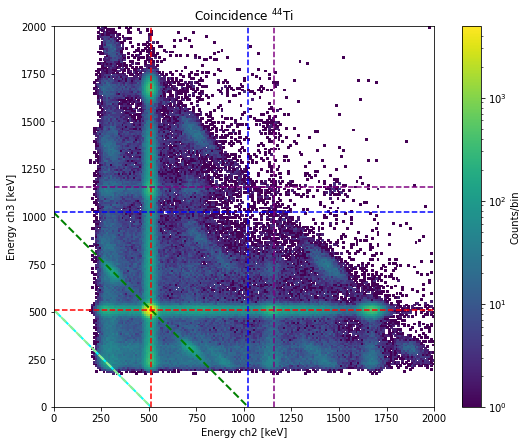

In [17]:
plt.figure(figsize=(10,7))
plt.hist2d(
    matched_ti44['e_ch2'],
    matched_ti44['e_ch3'], 
    bins = 200, 
    norm=LogNorm(),
    range=[[0,2000],[0,2000]]);
plt.plot([511,0], [0,511], linestyle = '--', linewidth = 2, c = 'cyan')
plt.plot([0,511], [511,0], linestyle = '--', linewidth = 2, c = 'lightgreen')
plt.plot([0,511+511], [511+511,0], linestyle = '--', linewidth = 2, c = 'green')
plt.gca().set_aspect(1)
plt.colorbar(label='Counts/bin')
plt.xlabel('Energy ch2 [keV]')
plt.ylabel('Energy ch3 [keV]')
plt.title('Coincidence ${}^{44}$Ti');
plt.axvline(511, c = 'r', linestyle = '--')
plt.axhline(511, c = 'r', linestyle = '--')
plt.axvline(511*2, c = 'b', linestyle = '--')
plt.axhline(511*2, c = 'b', linestyle = '--')
plt.axvline(1157, c = 'purple', linestyle = '--', label = '1157 keV')
plt.axhline(1157, c = 'purple', linestyle = '--', label = '1157 keV')

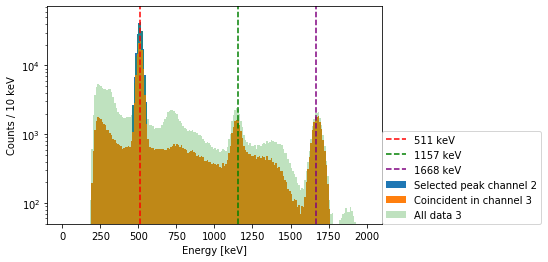

In [18]:
selected_data = RP2021.select_peak(matched_ti44, 'e_ch2', energy = 511, energy_range = 50)
plt.hist(selected_data['e_ch2'], bins = 200, range=[0,2000], label = 'Selected peak channel 2')
plt.hist(selected_data['e_ch3'], bins = 200, range=[0,2000], label = 'Coincident in channel 3')
plt.hist(matched_ti44['e_ch3'], bins = 200, range=[0,2000], label = 'All data 3', alpha = 0.3)
plt.axvline(511, c = 'r', linestyle = '--', label = '511 keV')
plt.axvline(1157, c = 'green', linestyle = '--', label = '1157 keV')
plt.axvline(1157+511, c = 'purple', linestyle = '--', label = f'{1157+511} keV')
plt.yscale('log')
plt.legend(loc=(1,0))
plt.xlabel('Energy [keV]')
plt.ylabel('Counts / 10 keV')
plt.ylim(ymin=50);

### Downloading more data.

You may want to use more data at some point, you can download additional data via:
- https://surfdrive.surf.nl/files/index.php/s/6CBbzKGvCrttLkp


## Generate huge dataframes (high statistics)
### WARNING:
unproper handing may result in high RAM usage and performance loss

I assume you have downloaded **and extracted** the zip files (see above) and the data is stored under ``/data/...``

## Ti44

In [19]:
save_dir = f'../data/ti44'

In [20]:
# Great we have the data where we expected it!
!ls $save_dir

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
# Let's make one giant array of pandas dataframes. We will combine them in a second
combined = []
for f in tqdm.tqdm(os.listdir(save_dir)):
    path = os.path.join(save_dir, f)
    combined.append(pd.read_csv(path))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../data/ti44'

In [ ]:
%%time
combined_ti44 = pd.concat(combined)

In [ ]:
combined_ti44

Wow! That is 116 **million** events, that is a lot! Things will take longer to compute.

In [ ]:
%%time
# Notice that we do have to check the time ordering as the csv-files are loaded in a random order
matched_ti44 = RP2021.easy_coincidence_matching(combined_ti44, source='Ti44', check_time_order = True)

In [ ]:
%%time
plt.figure(figsize=(10,7))
plt.hist2d(
    matched_ti44['e_ch2'],
    matched_ti44['e_ch3'], 
    bins = 200, 
    norm=LogNorm(),
    range=[[0,2000],[0,2000]]);
plt.plot([511,0], [0,511], linestyle = '--', linewidth = 2, c = 'cyan')
plt.plot([0,511], [511,0], linestyle = '--', linewidth = 2, c = 'lightgreen')
plt.plot([0,511+511], [511+511,0], linestyle = '--', linewidth = 2, c = 'green')
plt.gca().set_aspect(1)
plt.colorbar(label='Counts/bin')
plt.xlabel('Energy ch2 [keV]')
plt.ylabel('Energy ch3 [keV]')
plt.title('Coincidence ${}^{44}$Ti');
plt.axvline(511, c = 'r', linestyle = '--')
plt.axhline(511, c = 'r', linestyle = '--')
plt.axvline(511*2, c = 'b', linestyle = '--')
plt.axhline(511*2, c = 'b', linestyle = '--')
plt.axvline(1157, c = 'purple', linestyle = '--', label = '1157 keV')
plt.axhline(1157, c = 'purple', linestyle = '--', label = '1157 keV')

### Co60
we can do the same trick again

In [ ]:
save_dir = f'../data/co60'

In [ ]:
# Great we have the data where we expected it!
!ls $save_dir

In [ ]:
# Let's make one giant array of pandas dataframes. We will combine them in a second
combined = []
for f in tqdm.tqdm(os.listdir(save_dir)):
    path = os.path.join(save_dir, f)
    combined.append(pd.read_csv(path))

In [ ]:
%%time
combined_co60 = pd.concat(combined)

In [ ]:
combined_co60

In [ ]:
%%time
# Notice that we do have to check the time ordering as the csv-files are loaded in a random order
matched_co60 = RP2021.easy_coincidence_matching(combined_co60, source='Co60', check_time_order = True)

In [ ]:
plt.figure(figsize=(10,7))
plt.hist2d(
    matched_co60['e_ch4'],
    matched_co60['e_ch5'], 
    bins = 200, 
    norm=LogNorm(),
    range=[[0,3000],[0,3000]]);
plt.plot([1332.5,0], [0,1332.5], linestyle = '--', linewidth = 2, c = 'cyan')
plt.plot([0,1173.2], [1173.2,0], linestyle = '--', linewidth = 2, c = 'lightgreen')
plt.plot([0,1173.2+1332.5], [1173.2+1332.5,0], linestyle = '--', linewidth = 2, c = 'green')
plt.gca().set_aspect(1)
plt.colorbar(label='Counts/bin')
plt.xlabel('Energy ch4 [keV]')
plt.ylabel('Energy ch5 [keV]')
plt.title('Coincidence ${}^{60}$Co');
plt.axvline(1173.2, c = 'r', linestyle = '--')
plt.axhline(1173.2, c = 'r', linestyle = '--')
plt.axvline(1332.5, c = 'b', linestyle = '--')
plt.axhline(1332.5, c = 'b', linestyle = '--')